In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import glob
import ipyparallel as ipp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import iBioGen

from sad_logLikZ import *

from collections import Counter
from itertools import combinations
from IPython.display import display

pd.set_option('display.max_columns', None)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
sad_logLikZ(np.array([1, 2, 3, 4, 4]))

0.16406403343629572

In [14]:
def sad_logLikZ(x):
    """sad_logLikZ -- this takes a 1D array of abundances, fits Fisher's logseries
       to it, then calculates the squared scaled difference between the likelihood
       of the observed data given the model and the likelihood of an ideal dataset"""
    x = x[x > 0]
    
    thisFit = fitFisher(x)
    print(thisFit)
    x0 = np.array(range(np.power(10, 6))) + 1
    print(x0)
    p0 = np.log(fisherPMF(x0, thisFit[0]))
    p0 = p0[np.isfinite(p0)]
    
    n = x.size
    m = sum(p0 * np.exp(p0)) * n
    v = sum(np.power(m/n - p0, 2) * np.exp(p0)) * n
    
    return np.power((thisFit[1] - m) / np.power(v, 0.5), 2)

def betax(z, a, b):
    """betax -- a helper function for fisherCMF that uses hypergeometric for 
       accuracy and speed"""
    return 1/a * np.power(z, a) * np.power(1-z, b) * special.hyp2f1(a+b, 1, a+1, z)

def fisherCMF(x, beta):
    """fisherCMF -- the CMF for the fisher logseries"""
    return 1 + betax(np.exp(-beta), x+1, 0) / np.log(1 - np.exp(-beta))

def fisherPMF(x, beta):
    """fisherPMF -- the PMF for the fisher logseries"""
    return 1 / np.log(1 / (1 - np.exp(-beta))) * np.exp(-beta * x) / x

def fitFisher(x):
    """ML for fisher logseries"""
    xbar = np.mean(x)
    
    def fun(b): 
        return -1 / np.log(1 - np.exp(-b)) * np.exp(-b)/(1 - np.exp(-b)) - xbar
    
    up = 1.1 * np.exp(2 * np.power(xbar - 0.1, -6)) * np.power(xbar - 0.1, -1.25)
    lo = 0.5 * np.exp(2 * np.power(xbar + 0.1, -5)) * np.power(xbar + 0.1, -1.5)
    
    mle = optimize.brentq(fun, lo, up)
    ll = sum(np.log(fisherPMF(x, mle)))
    
    return [mle, ll]


## example of how it works
sad_logLikZ(np.array([1, 2, 3, 4, 4]))

[0.18127216982512456, -10.032815564492767]
[      1       2       3 ...  999998  999999 1000000]


/home/isaac/miniconda3/envs/iBioGen/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


0.16406403343629572

[0.0021715261810138537, -24.718090470862034]
[0.38468223 0.17403744 0.10498373 0.0712449  0.05157204 0.03888693
 0.03015973 0.02387844 0.01920543 0.01564001]


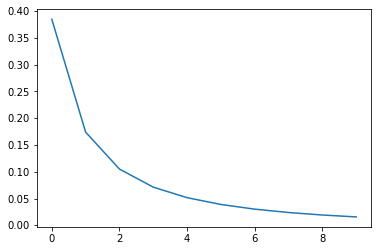

In [82]:
x = np.array([1,2,3,4,40,400])
thisFit = fitFisher(x)
print(thisFit)
x0 = np.array(range(np.power(10, 1))) + 1
#p0 = np.log(fisherPMF(x0, thisFit[0]))
p0 = fisherPMF(x0, 0.1)
print(p0)
p0 = p0[np.isfinite(p0)]
_ = plt.plot(p0)

[0.39086503 0.5667543  0.67228786 0.74352301 0.79481232 0.8332793
 0.86295383 0.88632252 0.90501748 0.92016039]


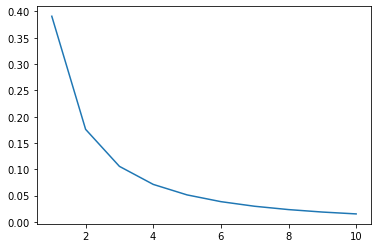

In [85]:
p = 0.9
x0 = np.array(range(np.power(10, 1))) + 1
print(logser.cdf(x0, p))
plt.plot(x0, logser.pmf(x0, p))

In [95]:
from scipy import stats
scipy.__version__

'1.6.0'

[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19.
 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37.]


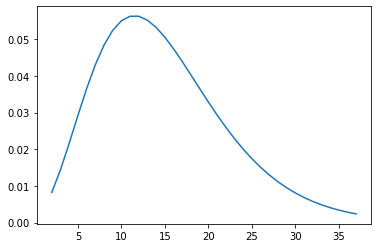

In [67]:
from scipy.stats import nbinom, logser
n, p = 5, 0.25
x = np.arange(nbinom.ppf(0.01, n, p),
              nbinom.ppf(0.99, n, p))
print(x)
prob = nbinom.cdf(x, n, p)
plt.plot(x, nbinom.pmf(x, n, p))